In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
#load dataset
data = load_breast_cancer()


In [2]:
#printing features names (column)
print("feature names :\n",data.feature_names)

feature names :
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
import pandas as pd

df =pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

In [4]:
print(f"print the shape {df.shape},print the head {df.head()}")

print the shape (569, 31),print the head    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  wors

In [5]:
print("target names(labels):",data.target_names)

target names(labels): ['malignant' 'benign']


In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# separate features and target
X = df.drop('target',axis=1)
y = df['target']

#split dataset(20% testing,80%training)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#checing target distribution in traing data
print("class distibution in training data:\n",y_train.value_counts())


class distibution in training data:
 target
1    286
0    169
Name: count, dtype: int64


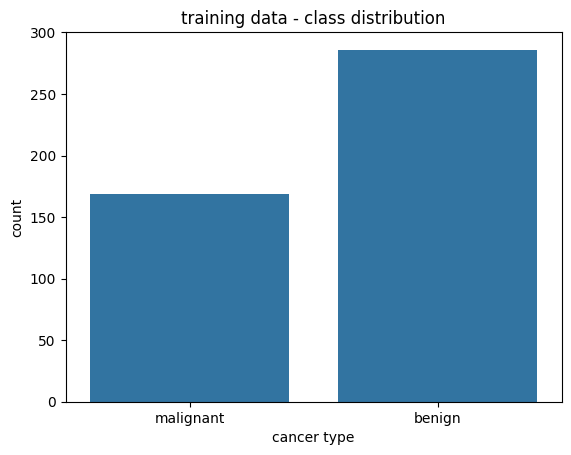

In [8]:
#visualize class balance
sns.countplot(x=y_train)
plt.title("training data - class distribution")
plt.xticks([0,1],data.target_names)
plt.xlabel("cancer type")
plt.ylabel("count")
plt.show()

In [9]:
#steps3:train a logistic Regrssion  model
from sklearn.linear_model import LogisticRegression

#create a model object
model = LogisticRegression(max_iter = 10000)

#fit(train) the model using traning  data
model.fit(X_train,y_train)


LogisticRegression(max_iter=10000)

In [10]:
#step 4:make predictions
y_pred = model.predict(X_test)
print("prediction probabilities  (first 5)",y_pred[:5])
print("true labels (first 5)",y_test[:5])

#predicting probalibilites for each class
y_pred_prob = model.predict_proba(X_test)
print("prediction probabilities  (first 5)",y_pred_prob[:5])

prediction probabilities  (first 5) [1 0 0 1 1]
true labels (first 5) 204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64
prediction probabilities  (first 5) [[1.23478439e-01 8.76521561e-01]
 [9.99999971e-01 2.94052334e-08]
 [9.98388079e-01 1.61192105e-03]
 [1.26347550e-03 9.98736524e-01]
 [1.48669418e-04 9.99851331e-01]]


In [11]:
# step 5:evaluate the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# claculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy score\n",accuracy)

# detailed classification report
print("classification report:\n",classification_report(y_test,y_pred))

# confusion matrix
print("confusion matrix:\n" , confusion_matrix(y_test,y_pred))


accuracy score
 0.956140350877193
classification report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

confusion matrix:
 [[39  4]
 [ 1 70]]


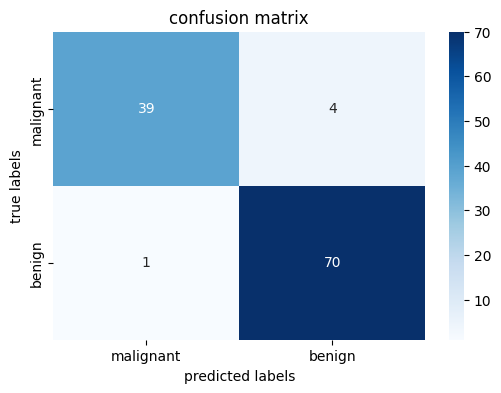

In [12]:
# step 6 - visualize the consuion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# compute confusion matrx
cm = confusion_matrix(y_test,y_pred)

# plot the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=data.target_names,yticklabels=data.target_names)
plt.xlabel("predicted labels")
plt.ylabel("true labels")
plt.title("confusion matrix")
plt.show()